In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
df_filtered = pd.read_csv('Filtered_Data.csv')
df_filtered.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,0.2750,1,0,A/5 21171,0.014151,0
1,3,1,3,"Heikkinen, Miss. Laina",1,0.3250,0,0,STON/O2. 3101282,0.015469,0
2,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0.4375,1,0,113803,0.103644,0
3,5,0,3,"Allen, Mr. William Henry",0,0.4375,0,0,373450,0.015713,0
4,6,0,3,"Moran, Mr. James",0,0.3500,0,0,330877,0.016510,2


In [5]:
df_filtered.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [6]:
# To Find statistical data from a dataset we have to remove all the non-numerical columns first

In [7]:
data = df_filtered[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked']]
data['Age'] = data['Age']*df['Age'].max()
data['Fare'] = data['Fare']*df['Fare'].max()
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,3,1,26.0,0,0,7.9250,0
2,1,1,1,35.0,1,0,53.1000,0
3,0,3,0,35.0,0,0,8.0500,0
4,0,3,0,28.0,0,0,8.4583,2


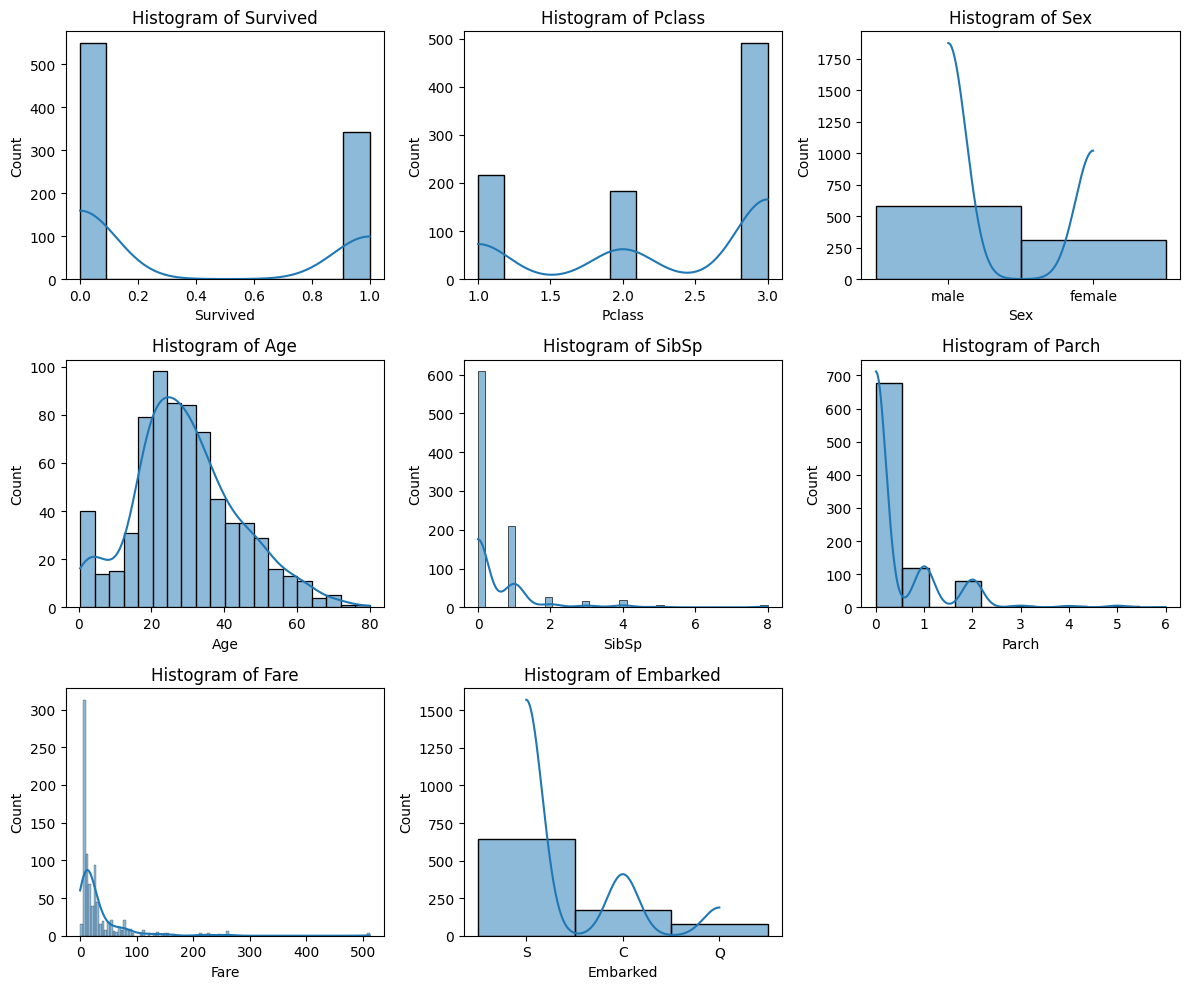

In [8]:
num_cols = data.columns

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 10))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(df[col], ax=axes[i], kde=True)
    axes[i].set_title(f'Histogram of {col}')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# summary statistics (mean, median, std)

In [9]:
data.mean()

Survived     0.339355
Pclass       2.480000
Sex          0.314839
Age         28.748710
SibSp        0.437419
Parch        0.340645
Fare        17.822091
Embarked     0.343226
dtype: float64

In [10]:
data.median()

Survived     0.0
Pclass       3.0
Sex          0.0
Age         28.0
SibSp        0.0
Parch        0.0
Fare        13.0
Embarked     0.0
dtype: float64

In [11]:
data.std()

Survived     0.473796
Pclass       0.734390
Sex          0.464752
Age         12.782123
SibSp        0.899838
Parch        0.785914
Fare        13.578085
Embarked     0.647697
dtype: float64

In [12]:
data.shape

(775, 8)

In [13]:
data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

# Pairplot and correlation matrix for feature relationships

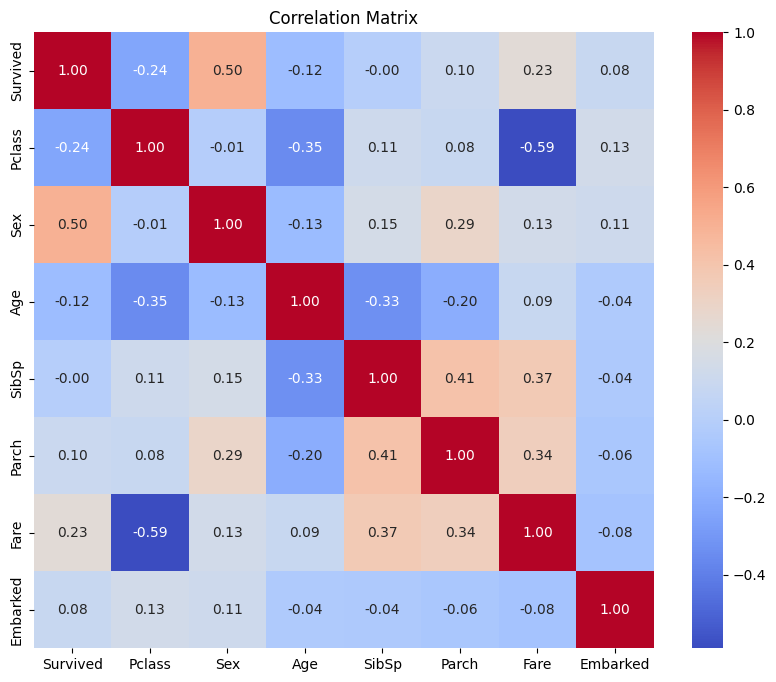

In [14]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [15]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

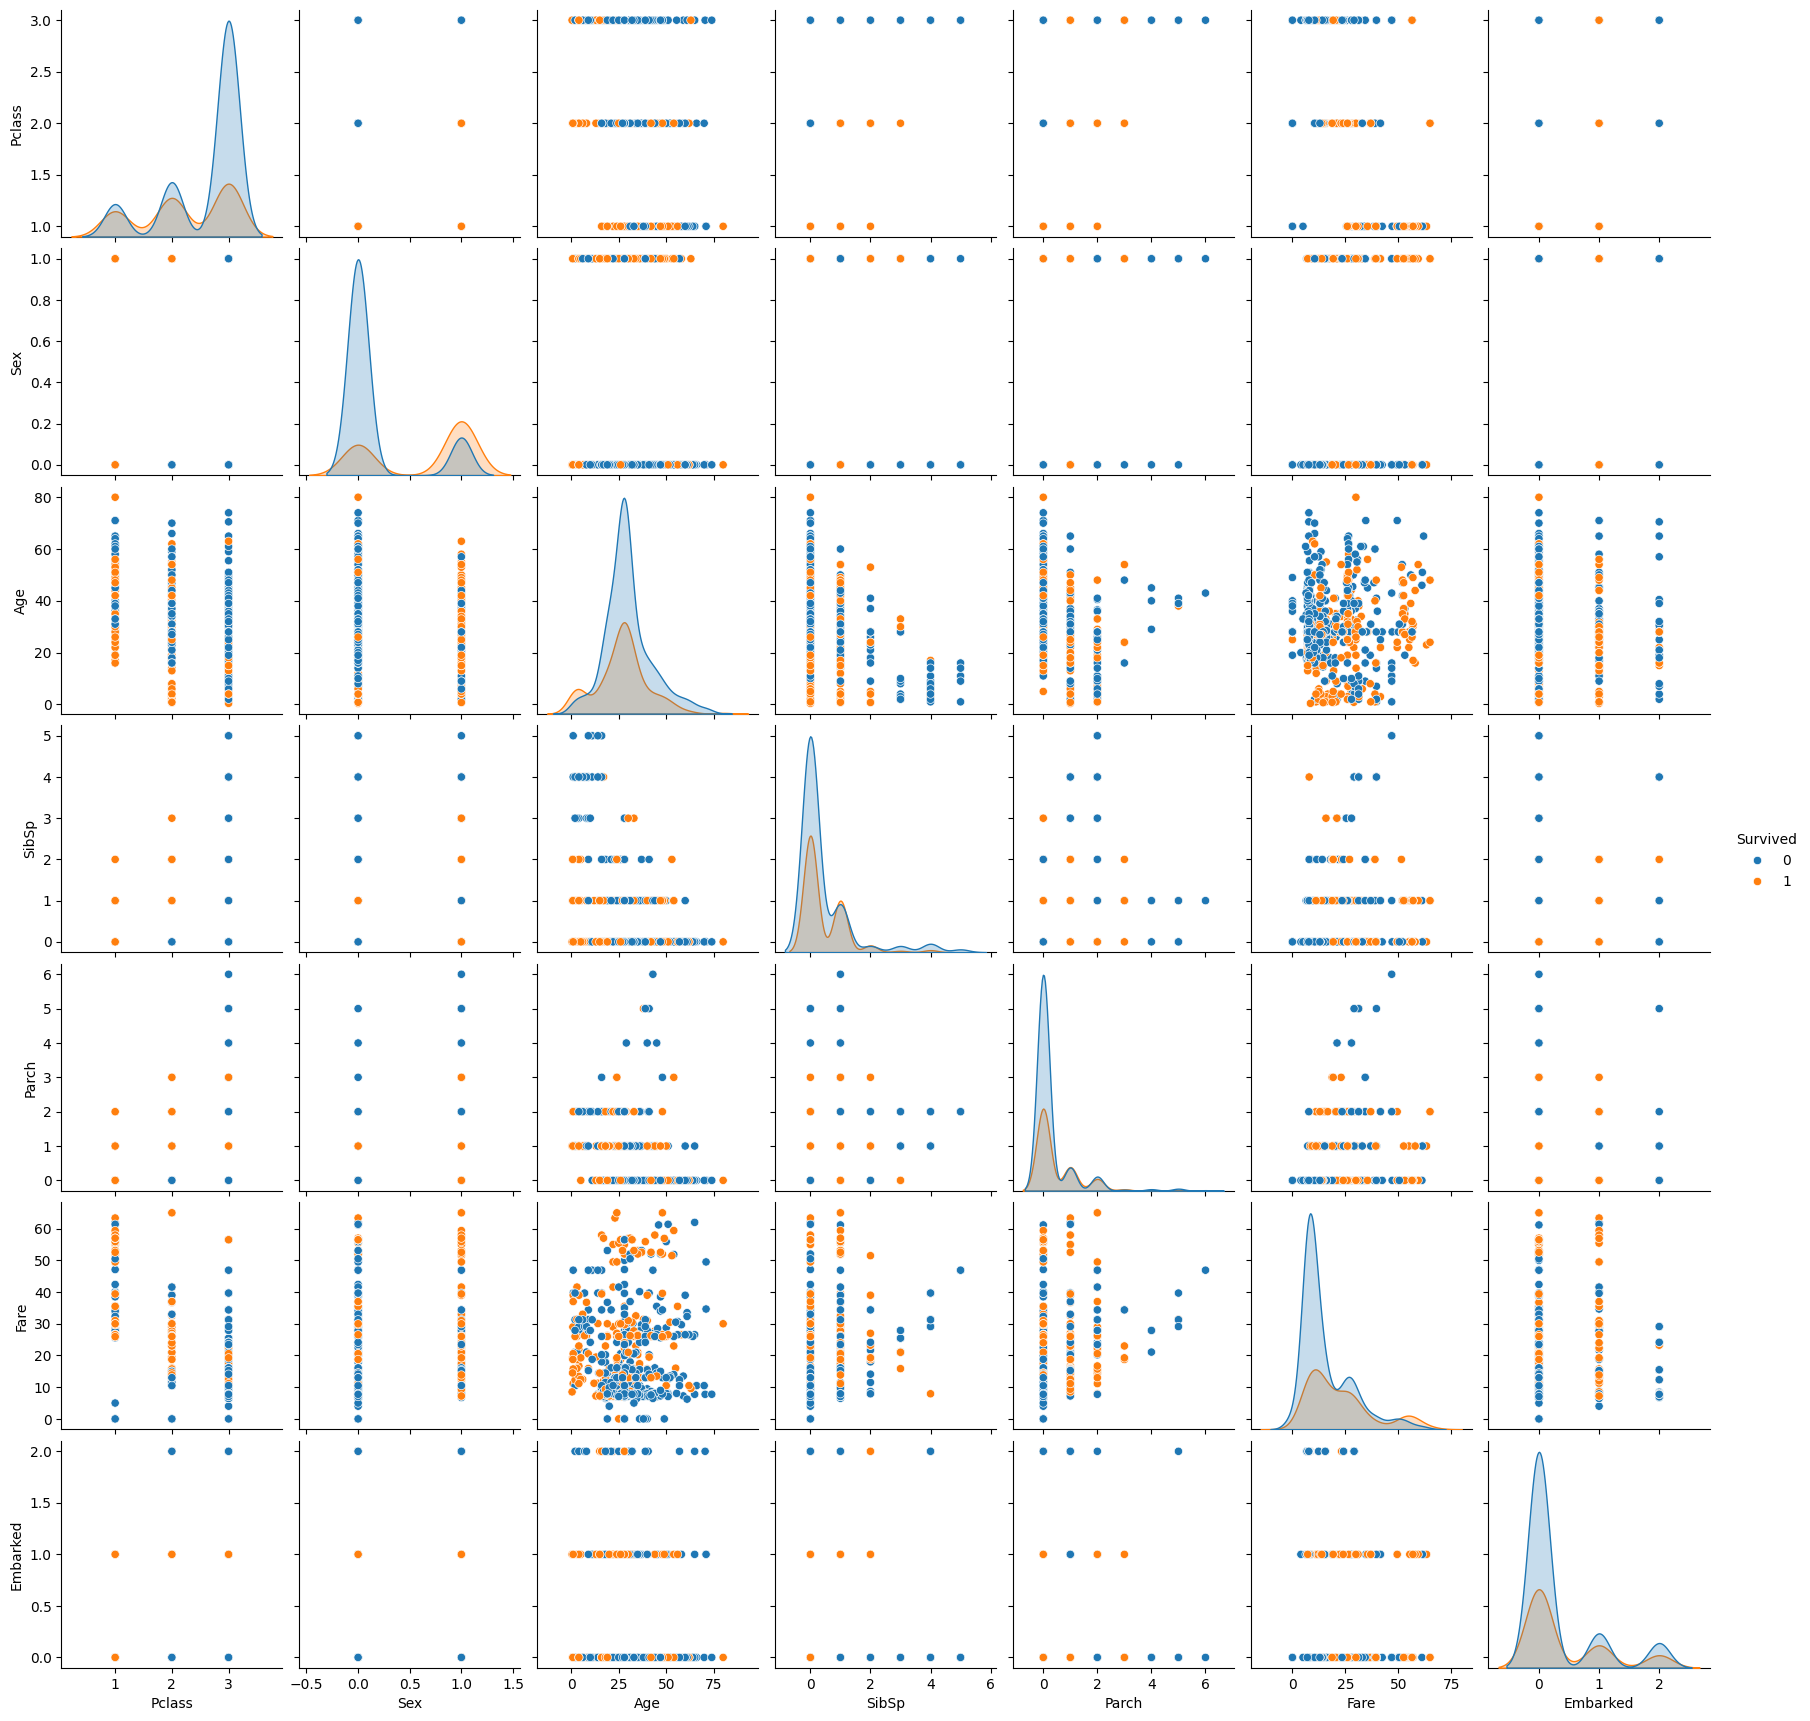

In [16]:
sns.pairplot(data[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked']].dropna(), hue='Survived')

# Using various models to correctly predict

In [17]:
from sklearn.model_selection import train_test_split

X = data.drop('Survived', axis=1)
y = data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


0.7548387096774194
              precision    recall  f1-score   support

           0       0.77      0.86      0.81        95
           1       0.73      0.58      0.65        60

    accuracy                           0.75       155
   macro avg       0.75      0.72      0.73       155
weighted avg       0.75      0.75      0.75       155



In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

model = DecisionTreeClassifier()  # No max_iter needed
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


0.7741935483870968
              precision    recall  f1-score   support

           0       0.79      0.85      0.82        95
           1       0.74      0.65      0.69        60

    accuracy                           0.77       155
   macro avg       0.76      0.75      0.76       155
weighted avg       0.77      0.77      0.77       155



In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


0.7612903225806451
              precision    recall  f1-score   support

           0       0.78      0.84      0.81        95
           1       0.72      0.63      0.67        60

    accuracy                           0.76       155
   macro avg       0.75      0.74      0.74       155
weighted avg       0.76      0.76      0.76       155



In [22]:
import tensorflow as tf
from tensorflow import keras

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_scaled.shape[1]))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_scaled, y, epochs=30, batch_size=16, validation_split=0.2)


Epoch 1/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.5441 - loss: 0.6974 - val_accuracy: 0.8129 - val_loss: 0.5623
Epoch 2/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7603 - loss: 0.5583 - val_accuracy: 0.8323 - val_loss: 0.4702
Epoch 3/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7721 - loss: 0.5155 - val_accuracy: 0.8258 - val_loss: 0.4233
Epoch 4/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8087 - loss: 0.4736 - val_accuracy: 0.8258 - val_loss: 0.4030
Epoch 5/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7892 - loss: 0.4654 - val_accuracy: 0.8258 - val_loss: 0.3938
Epoch 6/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7863 - loss: 0.4729 - val_accuracy: 0.8323 - val_loss: 0.3881
Epoch 7/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8043 - loss: 0.4193 - val_accuracy: 0.8323 - val_loss: 0.3826
Epoch 8/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7712 - loss: 0.5077 - val_accuracy: 0.8323 - val_loss